In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

from CRISMrelatedMethods.preprocessing import *
from CRISMrelatedMethods.dataRead import *
from CRISMrelatedMethods.preprocess_pipeline import *

In [2]:
spectralLibPath='../spectralLibrary/'

Wstart,Wend=1.0472,2.64834
spectralWavelength,spectralIF,spectralFiles,mineralNames,spectralWavelengthSet=readSpectralLib(spectralLibPath,startW=Wstart,endW=Wend,col=3)
# col = 1: ratioed I/F ; 3:numarator I/F ; 5:denominator I/F

print(len(spectralWavelengthSet))
print(mineralNames)

241
{0: 'alunite', 1: 'al_smectite', 2: 'analcime', 3: 'bassanite', 4: 'chloride', 5: 'chlorite', 6: 'co2_ice', 7: 'epidote', 8: 'fe_ca_carbonate', 9: 'fe_olivine', 10: 'fe_smectite', 11: 'gypsum', 12: 'h2o_ice', 13: 'hcp', 14: 'hematite', 15: 'hydrated_silica', 16: 'hydrox_fe_sulf', 17: 'illite_muscovite', 18: 'jarosite', 19: 'kaolinite', 20: 'lcp', 21: 'margarite', 22: 'mg_carbonate', 23: 'mg_olivine', 24: 'mg_smectite', 25: 'mono_hyd_sulf', 26: 'plagioclase', 27: 'poly_hyd_sulf', 28: 'prehnite', 29: 'serpentine', 30: 'talc'}


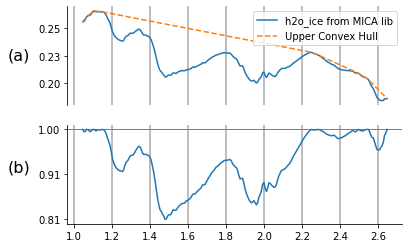

In [3]:
ind=12

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(6,4))

smParams={'smWindow':5,'smOrder':2,'stdRatio':.5,'SRwindowSize':3}
spec_interp=getPreProcessed(myInterpolation(spectralWavelength[ind],spectralIF[ind],spectralWavelengthSet),prepSteps='smSR',smParams=smParams)
uch=getUpperCH(spec_interp,targetWL=spectralWavelengthSet)

ax[0].plot(spectralWavelengthSet,spec_interp,label=mineralNames[ind]+' from MICA lib')
ax[0].plot(spectralWavelengthSet,uch, '--',label='Upper Convex Hull')
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].grid(axis='x',which='both',color='darkgray',linewidth=1.5)
ax[0].text(.65,np.median(uch)-.02,'(a)',size=16)
ax[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax[0].legend()

cr=getPreProcessed(spec_interp,prepSteps='CR')
ax[1].axhline(y=1,linewidth=1, color='gray')
ax[1].plot(spectralWavelengthSet,cr)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_yticks(np.linspace(np.min(cr),np.max(cr),3))
ax[1].grid(axis='x',which='both',color='darkgray',linewidth=1.5)
ax[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax[1].text(.65,np.median(cr)-.025,'(b)',size=16)
# plt.savefig('cr_methodology_1.png',dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()    

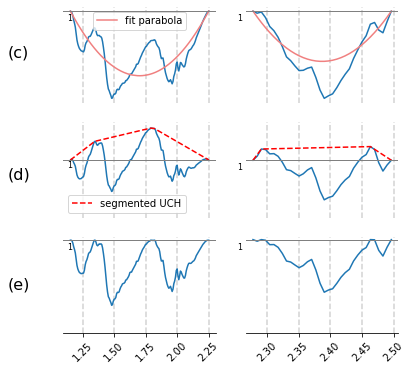

In [4]:
P=getConvexConaveUH2(spec_interp,returnPlot=True,maximalimit=1,targetWL=spectralWavelengthSet)
for p in P:
    p['segSpec_Y']=np.array(p['spec_Y'])/np.array(p['fit_Y'])

fig, ax = plt.subplots(nrows=3, ncols=len(P),figsize=(6,6))
for p in range(len(P)):
    
    ax[0,p].plot(P[p]['spec_X'],P[p]['spec_Y'])
    if p==0:
        ax[0,p].plot(P[p]['fit_X'],P[p]['fit_Y'],color='lightcoral',label='fit parabola')
    else:
        ax[0,p].plot(P[p]['fit_X'],P[p]['fit_Y'],color='lightcoral')
    
    seguch=getUpperCH(P[p]['segSpec_Y'],targetWL=P[p]['fit_X'])
    ax[1,p].plot(P[p]['fit_X'],P[p]['segSpec_Y'])
    if p==0: ax[1,p].plot(P[p]['fit_X'],seguch,'--',color='r',label='segmented UCH')
    else: ax[1,p].plot(P[p]['fit_X'],seguch,'--',color='r')
    
    ax[2,p].plot(P[p]['fit_X'],P[p]['segSpec_Y']/seguch)
    
    for x in [0,1,2]:
        ax[x,p].text(np.min(P[p]['spec_X'])-.025,.98 if p==0 else .998,1,size=8)
        ax[x,p].axhline(y=1,linewidth=1, color='gray')
        ax[x,p].set_yticks(np.linspace(np.min(P[p]['spec_Y']),np.max(P[p]['spec_Y']),3))
        if p<0: # ==
            ax[x,p].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        else:
            ax[x,p].tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=False)
            ax[x,p].spines['left'].set_visible(False)
            
        if x==1:
            ax[x,p].spines['left'].set_visible(False)
            ax[x,p].tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=False)
        if x==2:
            ax[x,p].xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
            ax[x,p].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                rotation=45)
        else:
            ax[x,p].spines['bottom'].set_visible(False)
            ax[x,p].tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
            
            
        ax[x,p].spines['right'].set_visible(False)
        ax[x,p].spines['top'].set_visible(False)
        ax[x,p].grid(axis='x',which='both',linestyle='--',color='lightgray',linewidth=1.5)
ax[0,0].text(.65,.9,'(c)',size=16)
ax[1,0].text(.65,.95,'(d)',size=16)
ax[2,0].text(.65,.9,'(e)',size=16)
ax[1,0].set_ylim(.85,1.1)
ax[1,1].set_ylim(.988,1.008)
# ax[1,0].text(1.04,.99,1,size=8)
# ax[2,0].text(1.04,.99,1,size=8)
ax[0,0].legend()
ax[1,0].legend()

plt.savefig('cr_methodology_2.png',dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()

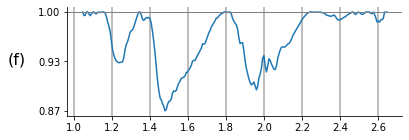

In [5]:
ind=0

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,2))

CC=getConvexConaveUH2(spec_interp,targetWL=spectralWavelengthSet,CR=True)
ax.plot(spectralWavelengthSet,CC)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(y=1,linewidth=1, color='gray')
ax.grid(axis='x',which='both',color='darkgray',linewidth=1.5)
ax.text(.65,.93,'(f)',size=16)
ax.set_yticks(np.linspace(np.min(CC),np.max(CC),3))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

# plt.savefig('cr_methodology_3.png',dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()    

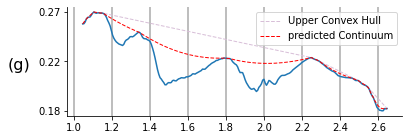

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(6,2))

ax.plot(spectralWavelengthSet,uch, '--',color='thistle',label='Upper Convex Hull',linewidth=1)

hull=myInterpolation([spectralWavelengthSet[i] for i in range(CC.shape[0]) if CC[i]==1 ],[spec_interp[i] for i in range(CC.shape[0]) if CC[i]==1 ],spectralWavelengthSet)
CS=spec_interp/hull
f=CS/CC

ax.plot(spectralWavelengthSet,spec_interp)

ax.plot(spectralWavelengthSet,f*hull,'--',color='r',label='predicted Continuum',linewidth=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='x',which='both',color='darkgray',linewidth=1.5)
ax.text(.65,np.median(spec_interp),'(g)',size=16)
ax.set_yticks(np.linspace(np.min(spec_interp),np.max(spec_interp),3))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
ax.legend()

plt.savefig('cr_methodology_5.png',dpi=300, bbox_inches = 'tight',pad_inches = 0)
plt.show()    